# Gibbs sampling in 2D

This is BONUS content related to Day 22, where we introduce Gibbs sampling

## Random variables

(We'll use 0-indexing so we have close alignment between math and python code)

* 2D random variable $z = [z_0, z_1]$
* each entry $z_d$ is a real scalar: $z_d \in \mathbb{R}$

## Target distribution

\begin{align}
p^*(z_0, z_1) =  \mathcal{N}\left(
    \left[ \begin{array}{c}
    0 \\ 0
    \end{array} \right],
    \left[
    \begin{array}{c c}
    1 & 0.8 \\
    0.8 & 2
    \end{array} \right] \right)
\end{align}

## Key takeaways

* New concept: 'Gibbs sampling', which just iterates between two conditional sampling distributions:

\begin{align}
    z^{t+1}_0 &\sim p^* (z_0 | z_1 = z^t_1) \\
    z^{t+1}_1 &\sim p^* (z_1 | z_0 = z^{t+1}_0)
\end{align}

## Things to remember

This is a simple example to illustrate the idea of how Gibbs sampling works.

There are other "better" ways of sampling from a 2d normal.


# Setup

In [1]:
import numpy as np


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=2.0)

# Step 1: Prepare for Gibbs sampling

## Define functions to sample from target's conditionals


In [3]:
def draw_z0_given_z1(z1, random_state):
    ## First, use Bishop textbook formulas to compute the conditional mean/var
    mean_01 = 0.4 * z1
    var_01 = 0.68
    
    ## Then, use simple transform to obtain a sample from this conditional
    ## Remember, if u ~ Normal(0, 1), a "standard" normal with mean 0 variance 1,
    ## then using transform: x <- T(u), with T(u) = \mu + \sigma * u
    ## we can say x ~ Normal(\mu, \sigma^2)
    u_samp = random_state.randn()
    z0_samp = mean_01 + np.sqrt(var_01) * u_samp
    return z0_samp

In [4]:
def draw_z1_given_z0(z0, random_state):
    ## First, use Bishop textbook formulas to compute conditional mean/var
    mean_10 = 0.8 * z0
    var_10 = 1.36
    
    ## Then, use simple transform to obtain a sample from this conditional
    ## Remember, if u ~ Normal(0, 1), a "standard" normal with mean 0 variance 1,
    ## then using transform: x <- T(u), with T(u) = \mu + \sigma * u
    ## we can say x ~ Normal(\mu, \sigma^2)
    u_samp = random_state.randn()
    z1_samp = mean_10 + np.sqrt(var_10) * u_samp
    return z1_samp

# Step 2: Execute the Gibbs sampling algorithm

Perform 6000 iterations.

Discard the first 1000 as "not yet burned in".

In [5]:
S = 6000
sample_list = list()
z_D = np.zeros(2)

random_state = np.random.RandomState(0) # reproducible random seeds

for t in range(S):
    z_D[0] = draw_z0_given_z1(z_D[1], random_state)
    z_D[1] = draw_z1_given_z0(z_D[0], random_state)
    
    if t > 1000:
        sample_list.append(z_D.copy()) # save copies so we get different vectors

In [6]:
z_samples_SD = np.vstack(sample_list)

## Step 3: Compare to samples from built-in routines for 2D MVNormal sampling

In [7]:
Cov_22 = np.asarray([[1.0, 0.8], [0.8, 2.0]])
true_samples_SD = random_state.multivariate_normal(np.zeros(2), Cov_22, size=S-1000)

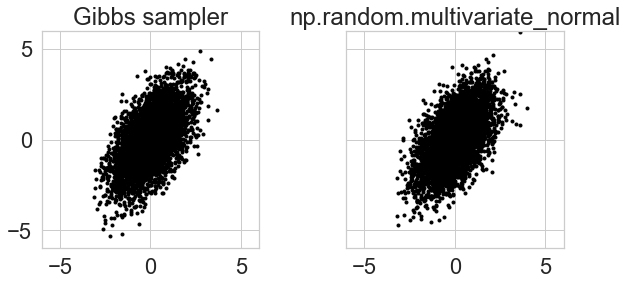

In [8]:
fig, ax_grid = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True, figsize=(10,4))

ax_grid[0].plot(z_samples_SD[:,0], z_samples_SD[:,1], 'k.')
ax_grid[0].set_title('Gibbs sampler')
ax_grid[0].set_aspect('equal', 'box');

ax_grid[1].plot(true_samples_SD[:,0], true_samples_SD[:,1], 'k.')
ax_grid[1].set_title('np.random.multivariate_normal')
ax_grid[1].set_aspect('equal', 'box');
ax_grid[1].set_xlim([-6, 6]);
ax_grid[1].set_ylim([-6, 6]);
